<a href="https://colab.research.google.com/github/piyushy1/DeepLearningNotes/blob/master/Mathematical_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook aims to provide you the mathematical background you need to understand the core theory of modern deep learning

**Linear Algebra** (Chapter 18)

Vectors: list of numbers  like v = [2,3,4]. Vectors can be represented in row and column.

Dot product between vectors give the angle between them. two vectors u and v so u.v = u^TV = Σ_i(u_i.v_i). So both u.v or v.u are same

angle between two vectors will be θ = arccos((v.w)/(∥v∥∥w∥))

**Compute Angle between Vectors**

MXNET Preinstallation requirements: Always check the version number and cuda version number. to check cuda run !nvcc--version and then use that version like for cuda 10.1 use mxnet-cu101

In [0]:
!pip install mxnet-cu101

     |████████████████████████████████| 710.5MB 26kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [0]:
!pip install d2l

In [0]:
%matplotlib inline
import d2l
from IPython import display
import mxnet as mx
from mxnet import gluon, np, npx
npx.set_np()

In [0]:
def calculatevectorangle(v1,v2):
  print('dot_product: ',np.dot(v1,v2))
  print('normalise_v1: ',np.linalg.norm(v1)) # this is vector magnitude https://mathinsight.org/definition/magnitude_vector
  print('normalise_v2: ',np.linalg.norm(v2))
  angle = np.arccos(np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2)))
  return angle

In [0]:
calculatevectorangle(np.array([0,1,2]),np.array([2,3,4]))

dot_product:  11.0
normalise_v1:  2.236068
normalise_v2:  5.3851647


array(0.41899002)

It is reasonable to ask: why is computing the angle useful? The answer comes in the kind of
invariance we expect data to have. Consider an image, and a duplicate image, where every pixel
value is the same but 10% the brightness. The values of the individual pixels are in general far
from the original values. Thus, if one computed the distance between the original image and the
darker one, the distance can be large.
However, for most ML applications, the content is the same—it is still an image of a cat as far as a
cat/dog classifier is concerned. However, if we consider the angle, it is not hard to see that for anlge between v and 0:1  v is zero. This corresponds to the fact that scaling
vectors keeps the same direction and just changes the length. The angle considers the darker
image identical.

Hpyeplanes.divide the vector into two spaces. Like if w.v = 1 then |v||w|cosθ =1  then |v|cosθ = 1/|w| so its the projection on vector w by v and it divides the vector w at 90 degree anlge. if w = [2,1]T then line divideng it will be 2x+y = 1 and y = 1-2x [Page 811]. In ML models these hyperplanes divide the classes and are also called decision planes.

In [0]:
# Load in the dataset
train = gluon.data.vision.FashionMNIST(train=True)
test = gluon.data.vision.FashionMNIST(train=False)

In [0]:
X_train_0 = np.stack([x[0] for x in train if x[1] == 0]).astype(float)
X_train_1 = np.stack([x[0] for x in train if x[1] == 1]).astype(float)

In [0]:
X_test = np.stack([x[0] for x in test if x[1] == 0 or x[1] == 1]).astype(float)
y_test = np.stack([x[1] for x in test if x[1] == 0 or x[1] == 1]).astype(float)

In [0]:
# Compute averages
ave_0 = np.mean(X_train_0, axis=0)
ave_1 = np.mean(X_train_1, axis=0)

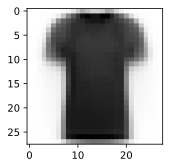

In [0]:
# Plot average t-shirt
d2l.set_figsize()
d2l.plt.imshow(ave_0.reshape(28, 28).tolist(), cmap='Greys')
d2l.plt.show()

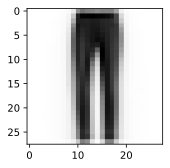

In [0]:
# Plot average trousers
d2l.plt.imshow(ave_1.reshape(28, 28).tolist(), cmap='Greys')
d2l.plt.show()

In [0]:
w = (ave_1 - ave_0).T
# predictions = X_test.reshape(2000, -1)
# print(predictions.shape, X_test.shape, w.flatten().shape)
predictions = X_test.reshape(2000, -1).dot(w.flatten()) > -1500000

# Accuracy
np.mean(predictions.astype(y_test.dtype) == y_test, dtype=np.float64)

array(0.4995, dtype=float64)

**Linear Tranformation: **

matrices can do to transform data between two potentially different high dimensional spaces takes significant practice. matrix multiplication can skew, rotate, and scale the grid, but
the grid structure must remain 

**Linear Dependence**

Linera dependence comes when sigma(a_iv_i) = 0. Linear dependence in column matrixmeans there is matrix is compressing the space down to some lower dimensions. If vecotrs are linear independent then no compression occurs.

**Rank**

Rank tells to what dimesion space the matrix maps in. Rank is number of linear  independent column matrices.

**Invertibility**
We have seen above that multiplication by a matrix with linearly dependent columns cannot be
undone, i.e., there is no inverse operation that can always recover the input. However, multiplication
by a full-rank matrix (i.e., some A that is n  n matrix with rank n), we should always be
able to undo it. AA^-1 =I (Indetity matrix)

In [1]:
import numpy as np
M = np.array([[1, 2], [1, 4]])
M_inv = np.array([[2, -1], [-0.5, 0.5]])
M_inv.dot(M) 

array([[1., 0.],
       [0., 1.]])

**Determinant**

Detrminant gives the area of the given vector. Determinants allow us to measure how much a matrix expands or contracts a spac. If the determinant is zero then it means the matrix multiplacation of that vector is compressed to line segement resulting to zero area. A matrix A is invertible if and only if its determinant is non zero.

In [2]:
# determinant
np.linalg.det(np.array([[1, -1], [2, 3]]))

5.000000000000001

**Tensors and Common Linear Algebra Operations**

Tensor contractions and Einstein summation provide for a neat and clean notation for expressing
many of the computations that are seen in machine learning

In [14]:
# Define tensors
C = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
B = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]], [[7, 8, 9], [10, 11, 12]]])
A = np.array([[1, 2], [3, 4]])
v = np.array([1, 2])

# Print out the shapes
print(A)
print('#######')
print(B)
A.shape, B.shape, v.shape, C.shape

[[1 2]
 [3 4]]
#######
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]

 [[ 7  8  9]
  [10 11 12]]]


((2, 2), (3, 2, 3), (2,), (2, 2, 3))

In [15]:
# Reimplement matrix multiplication
np.einsum("ij, j -> i", A, v), A.dot(v)

(array([ 5, 11]), array([ 5, 11]))